Trung bình thời gian tính toán UPF Path:
	bằng UPMF:  10.522475
	bằng SMF:   0.184905
Trung bình thời gian thiết lập hoàn tất PDU session cho UE:
	- UPMF:  464.2019630796346
	- SMF:   453.6672639846802


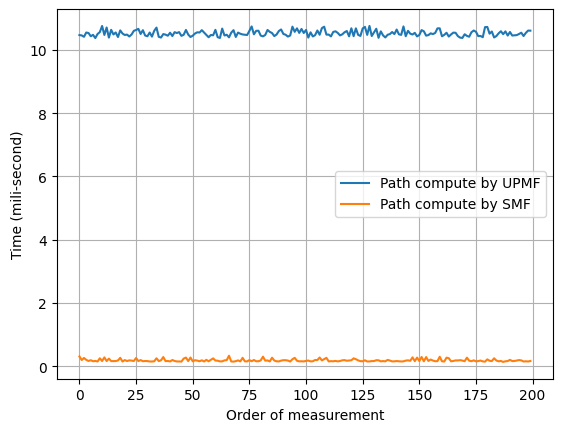

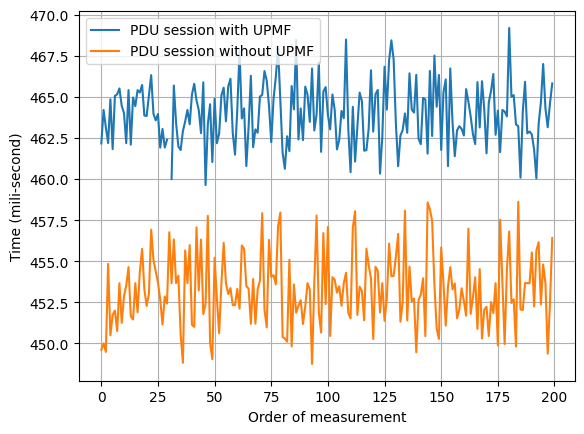

In [177]:
import pandas as pd
import matplotlib.pyplot as plt

path_upmf = pd.read_csv("upmf.csv") - 4
path_smf = pd.read_csv("smf.csv") - 10

path_upmf = path_upmf.sort_values(by="pathUPMF", ascending=False)
path_smf = path_smf.sort_values(by="pathSMF", ascending=False)


ue_upmf = pd.read_csv('ueUpmf.csv', header=None) - 1713266776
ue_upmf["ueUPMF"] = (ue_upmf[1] - ue_upmf[0]) * 1000 + 10
ue_smf = pd.read_csv('ueSmf.csv', header=None) - 1713270190
ue_smf["ueSMF"] = (ue_smf[1] - ue_smf[0]) * 1000

ue_upmf = ue_upmf.sort_values(by="ueUPMF", ascending=False)
ue_smf = ue_smf.sort_values(by="ueSMF", ascending=False)


data = pd.concat([path_upmf, path_smf, ue_upmf["ueUPMF"], ue_smf["ueSMF"]], axis=1)
data = data.sample(frac=1).reset_index(drop=True)
data.to_csv("mininet.csv", index=False)

print("Trung bình thời gian tính toán UPF Path:")
print("\tbằng UPMF: ", data["pathUPMF"].mean())
print("\tbằng SMF:  ", data["pathSMF"].mean())

print("Trung bình thời gian thiết lập hoàn tất PDU session cho UE:")
print("\t- UPMF: ", data["ueUPMF"].mean())
print("\t- SMF:  ", data["ueSMF"].mean())

# --------------------------------
column_means = data.mean()
for column in data.columns:
    if column == "ueUPMF" or column == "ueSMF":
        mean = column_means[column]
        mask = abs(data[column] - mean) > 5
        data.loc[mask, column] = mean

# --------------------------------
col_path_upmf = data["pathUPMF"]
col_path_smf = data["pathSMF"]

plt.plot(col_path_upmf, label="Path compute by UPMF")
plt.plot(col_path_smf, label="Path compute by SMF")

plt.xlabel('Order of measurement')
plt.ylabel('Time (mili-second)')
plt.legend()
plt.grid(True)
plt.show()

# --------------------------------
col_path_upmf = data["ueUPMF"]
col_path_smf = data["ueSMF"]

plt.plot(col_path_upmf, label="PDU session with UPMF")
plt.plot(col_path_smf, label="PDU session without UPMF")

plt.xlabel('Order of measurement')
plt.ylabel('Time (mili-second)')
plt.legend()
plt.grid(True)
plt.show()